In [6]:
#导入库
from cylib.qmtdata.cyxtdata import xtdata  
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
import numpy as np

In [7]:
start_date = '2004-06-1'
end_date = '2024-6-23'

In [8]:
pd.set_option('display.max_rows', 5)

In [9]:
st_path = '权益-股票.xlsx'
df_st = pd.read_excel(st_path, engine='openpyxl')
df_st.index = df_st['指标名称']
df_st = df_st.rename_axis('stocks', axis='index')
df_st = df_st.drop(df_st.columns[0], axis=1)
df_st = df_st[(df_st.index >= start_date) & (df_st.index <= end_date)]
df_st = df_st.iloc[::21]

In [10]:
#环比
styoy_0 = df_st.pct_change(12)
styoy = styoy_0.fillna(0)

In [11]:
#pca股票环比
data_array = styoy.to_numpy()
#NaN,inf->0
data_array[np.isinf(data_array)] = 0
pca_styoy = PCA(n_components=6)
pca_styoy.fit(data_array)
transformed_data = pca_styoy.transform(data_array)

#DataFrame
pca_styoy_df = pd.DataFrame(transformed_data, index=styoy.index, columns=['PCA1_styoy', 'PCA2_styoy', 'PCA3_styoy', 'PCA4_styoy', 'PCA5_styoy', 'PCA6_styoy'])
pca_styoy_df = pca_styoy_df.iloc[11:]

In [12]:
#债券
de_path = '债券1forPCA.xlsx'
df_de = pd.read_excel(de_path, engine='openpyxl')
df_de.index = df_de['Unnamed: 0']
df_de = df_de.drop(df_de.columns[0], axis=1)
df_de = df_de.loc[df_st.index]
#df_de = df_de[(df_de.index >= start_date) & (df_de.index <= end_date)]
#df_de = df_de.iloc[::22]

#环比
deyoy_0 = df_de.pct_change(12)
deyoy = deyoy_0.fillna(0)

#pca股票环比
data_array = deyoy.to_numpy()
#NaN,inf->0
data_array[np.isinf(data_array)] = 0
pca_deyoy = PCA(n_components=6)
pca_deyoy.fit(data_array)
transformed_data = pca_deyoy.transform(data_array)
#DataFrame
pca_deyoy_df = pd.DataFrame(transformed_data, index=deyoy.index, columns=['PCA1_deyoy', 'PCA2_deyoy', 'PCA3_deyoy', 'PCA4_deyoy', 'PCA5_deyoy', 'PCA6_deyoy'])
pca_deyoy_df = pca_deyoy_df.iloc[11:]

In [14]:
#商品
gd_path = '南华商品指数.xlsx'
df_gd = pd.read_excel(gd_path, engine='openpyxl')
df_gd.index = df_gd['指标名称']
df_gd = df_gd.rename_axis('goods', axis='index')
df_gd = df_gd.drop(df_gd.columns[0], axis=1)
df_gd = df_gd.loc[df_st.index]
#df_gd = df_gd[(df_gd.index >= start_date) & (df_gd.index <= end_date)]
#df_gd = df_gd.iloc[::21]
#删除一些数据
columns_to_drop = [col for col in df_gd.columns if df_gd[col].iloc[0] == 0]
df_gd = df_gd.drop(columns=columns_to_drop)
#环比
gdyoy_0 = df_gd.pct_change(12)
gdyoy = gdyoy_0.fillna(0)

#pca股票环比
data_array = gdyoy.to_numpy()
#NaN,inf->0
data_array[np.isinf(data_array)] = 0
pca_gdyoy = PCA(n_components=6)
pca_gdyoy.fit(data_array)
transformed_data = pca_gdyoy.transform(data_array)
#DataFrame
pca_gdyoy_df = pd.DataFrame(transformed_data, index=gdyoy.index, columns=['PCA1_gdyoy', 'PCA2_gdyoy', 'PCA3_gdyoy', 'PCA4_gdyoy', 'PCA5_gdyoy', 'PCA6_gdyoy'])
pca_gdyoy_df = pca_gdyoy_df.iloc[11:]

In [15]:
#跨境
cr_path = '海外权益.xlsx'
df_cr = pd.read_excel(cr_path, engine='openpyxl')
df_cr.index = df_cr['指标名称']
df_cr = df_cr.rename_axis('cross', axis='index')
df_cr = df_cr.drop(df_cr.columns[0], axis=1)

#删除一些数据
df_cr = df_cr.drop(df_cr.columns[8], axis=1)
#df_cr = df_cr[(df_cr.index >= start_date) & (df_cr.index <= end_date)]
#df_cr = df_cr.iloc[::29]
df_cr = df_cr.loc[df_st.index]
#补全数据
df_cr.replace(0, np.nan, inplace=True)# 将所有的0替换为NaN
df_cr.fillna(method='bfill', inplace=True)# 向前填充NaN值

#环比
cryoy_0 = df_cr.pct_change(12)
cryoy = cryoy_0.fillna(0)

#pca股票环比
data_array = cryoy.to_numpy()
#NaN,inf->0
data_array[np.isinf(data_array)] = 0
pca_cryoy = PCA(n_components=6)
pca_cryoy.fit(data_array)
transformed_data = pca_cryoy.transform(data_array)
#DataFrame
pca_cryoy_df = pd.DataFrame(transformed_data, index=cryoy.index, columns=['PCA1_cryoy', 'PCA2_cryoy', 'PCA3_cryoy', 'PCA4_cryoy', 'PCA5_cryoy', 'PCA6_cryoy'])
pca_cryoy_df = pca_cryoy_df.iloc[11:]

<Axes: xlabel='stocks'>

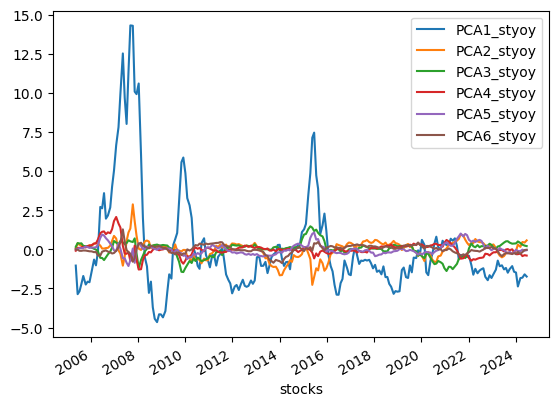

In [17]:
pca_styoy_df.plot()

<Axes: xlabel='stocks'>

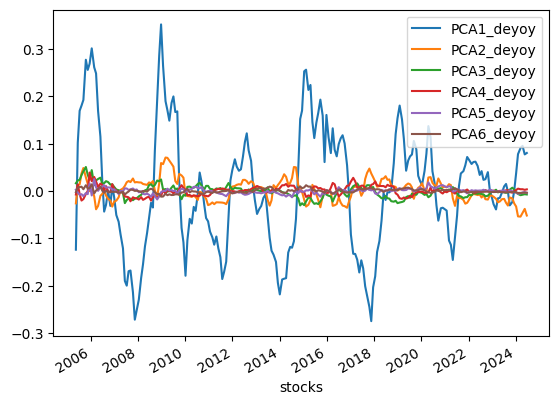

In [18]:
pca_deyoy_df.plot()

<Axes: xlabel='stocks'>

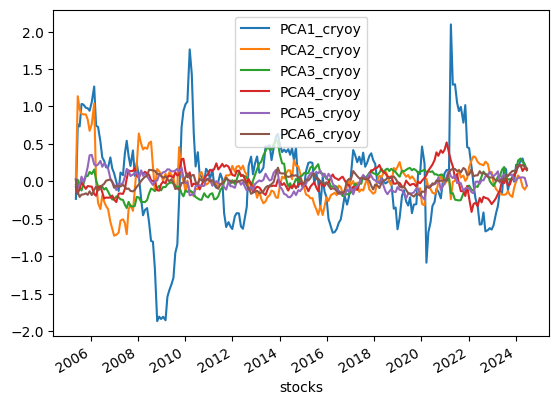

In [19]:
pca_cryoy_df.plot()

<Axes: xlabel='stocks'>

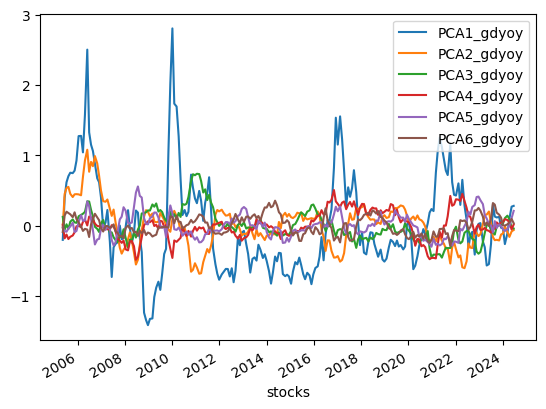

In [20]:
pca_gdyoy_df.plot()

<Axes: xlabel='stocks'>

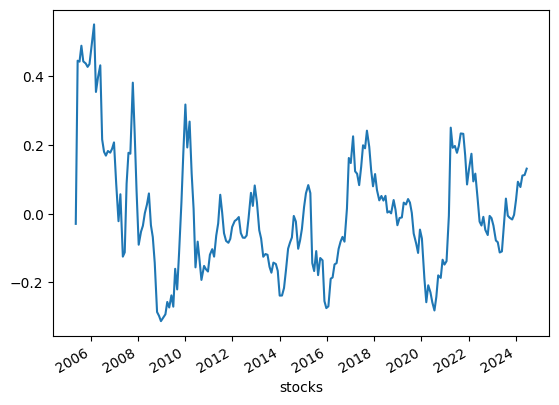

In [21]:
#风格因子(pca2和pca3加权平均)
style_factor_1 = ((pca_styoy_df['PCA2_styoy'] + pca_styoy_df['PCA3_styoy'])/2 + (pca_deyoy_df['PCA2_deyoy'] + pca_deyoy_df['PCA3_deyoy'])/2 + (pca_gdyoy_df['PCA1_gdyoy'] + pca_gdyoy_df['PCA2_gdyoy'])/2 + (pca_cryoy_df['PCA1_cryoy'] + pca_cryoy_df['PCA2_cryoy'])/2)/4
style_factor_1.plot()

In [15]:
style_factor_1.to_csv('style_factor_1.csv', index=False)